<table align="left" width=100%>
    <tr>
        <td width="12%">
            <img src="../images/RA_Logo.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Linear Regression - 3 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/vidyadharbendre/learn_advanced_python_using_examples/blob/main/notebooks/OOPs/class_linear_regression_hours_marks_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/vidyadharbendre/learn_advanced_python_using_examples/blob/main/notebooks/OOPs/class_linear_regression_hours_marks_3.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

In [23]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression as SklearnLinearRegression
import statsmodels.api as sm

Sklearn Model R-squared: 0.6521157503858555
Statsmodels R-squared: 0.7597598292034168


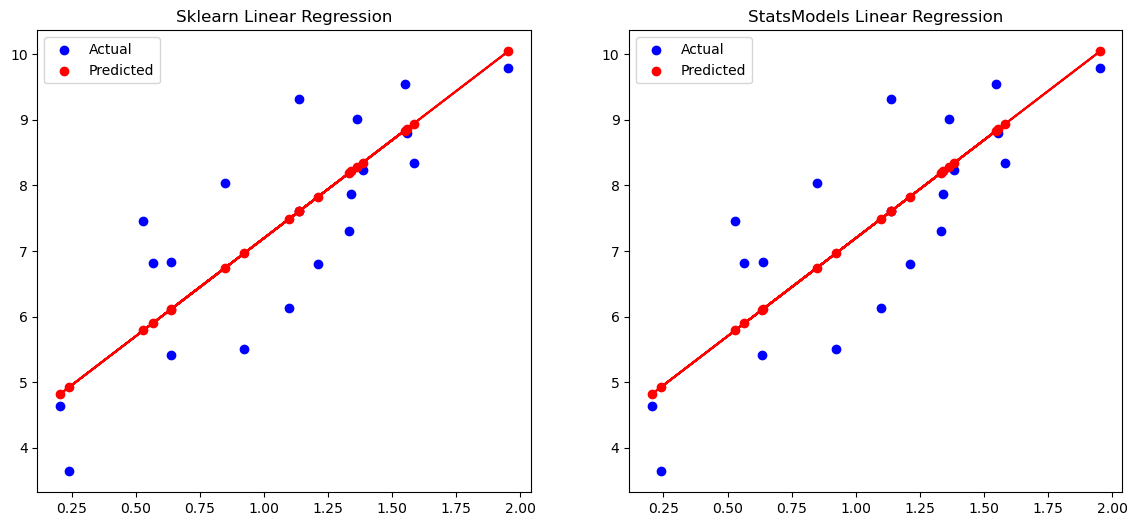

In [24]:
# DataHandler Class
class DataHandler:
    def __init__(self):
        self.X = None
        self.y = None

    def from_numpy(self, X, y):
        self.X = X
        self.y = y
    
    def read_csv(self, file_path):
        data = pd.read_csv(file_path)
        self.X = data.iloc[:, :-1].values
        self.y = data.iloc[:, -1].values
    
    def read_xlsx(self, file_path, sheet_name=0):
        data = pd.read_excel(file_path, sheet_name=sheet_name)
        self.X = data.iloc[:, :-1].values
        self.y = data.iloc[:, -1].values
    
    def split_data(self, test_size=0.2, random_state=42):
        return train_test_split(self.X, self.y, test_size=test_size, random_state=random_state)
    
    def get_features(self):
        return self.X
    
    def get_labels(self):
        return self.y

# SklearnLinearRegression Class
class SklearnLinearRegressionModel:
    def __init__(self):
        self.model = SklearnLinearRegression()
    
    def fit(self, X, y):
        self.model.fit(X, y)
    
    def predict(self, X):
        return self.model.predict(X)
    
    def evaluate(self, X, y):
        predictions = self.predict(X)
        return r2_score(y, predictions)

# StatsModelsLinearRegression Class
class StatsModelsLinearRegression:
    def __init__(self):
        self.model = None
    
    def fit(self, X, y):
        X_b = sm.add_constant(X)
        self.model = sm.OLS(y, X_b).fit()
    
    def predict(self, X):
        X_b = sm.add_constant(X)
        return self.model.predict(X_b)
    
    def summary(self):
        return self.model.summary()
    
    def evaluate(self, X, y):
        predictions = self.predict(X)
        return self.model.rsquared

# Generate Data and Initialize DataHandler
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

data_handler = DataHandler()
data_handler.from_numpy(X, y)
X = data_handler.get_features()
y = data_handler.get_labels()

X_train, X_test, y_train, y_test = data_handler.split_data()

# Sklearn Linear Regression model
sklearn_model = SklearnLinearRegressionModel()
sklearn_model.fit(X_train, y_train)
predictions_sklearn = sklearn_model.predict(X_test)
r2_sklearn = sklearn_model.evaluate(X_test, y_test)

print(f"Sklearn Model R-squared: {r2_sklearn}")

# StatsModels Linear Regression model
model_statsmodels = StatsModelsLinearRegression()
model_statsmodels.fit(X_train, y_train)
predictions_statsmodels = model_statsmodels.predict(X_test)
r2_statsmodels = model_statsmodels.evaluate(X_test, y_test)

print(f"Statsmodels R-squared: {r2_statsmodels}")

# Plot results side by side
plt.figure(figsize=(14, 6))

# Sklearn results
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, predictions_sklearn, color='red', label='Predicted')
plt.plot(X_test, predictions_sklearn, color='red')
plt.legend()
plt.title("Sklearn Linear Regression")

# StatsModels results
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, predictions_statsmodels, color='red', label='Predicted')
plt.plot(X_test, predictions_statsmodels, color='red')
plt.legend()
plt.title("StatsModels Linear Regression")

plt.show()

Sklearn R-squared: 0.7057111464258459


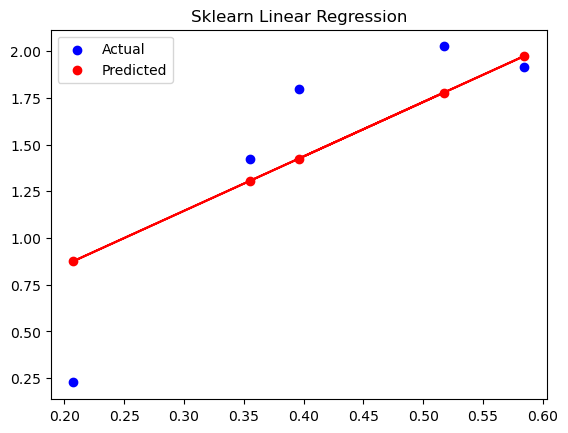

Statsmodels R-squared: 0.7325799959303316


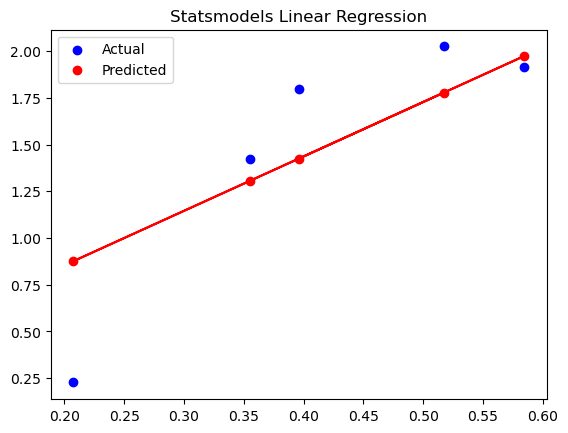

In [25]:
# Define the custom Linear Regression class
class LinearRegressionModel:
    def __init__(self, method='sklearn'):
        if method not in ['sklearn', 'statsmodels']:
            raise ValueError("Method must be either 'sklearn' or 'statsmodels'")
        self.method = method
        self.model = None
    
    def fit(self, X, y):
        if self.method == 'sklearn':
            self.model = SklearnLinearRegression()
            self.model.fit(X, y)
        elif self.method == 'statsmodels':
            X = sm.add_constant(X)  # Add intercept
            self.model = sm.OLS(y, X).fit()
    
    def predict(self, X):
        if self.method == 'sklearn':
            return self.model.predict(X)
        elif self.method == 'statsmodels':
            X = sm.add_constant(X)  # Add intercept
            return self.model.predict(X)
    
    def evaluate(self, X, y):
        predictions = self.predict(X)
        if self.method == 'sklearn':
            return r2_score(y, predictions)
        elif self.method == 'statsmodels':
            return self.model.rsquared

# Generate example data
X = np.random.rand(25, 1)  # 25 samples, 1 feature
y = 3.5 * X.squeeze() + np.random.randn(25) * 0.5  # Linear relation with noise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using sklearn
model_sklearn = LinearRegressionModel(method='sklearn')
model_sklearn.fit(X_train, y_train)
predictions_sklearn = model_sklearn.predict(X_test)
r2_sklearn = model_sklearn.evaluate(X_test, y_test)
print(f"Sklearn R-squared: {r2_sklearn}")

# Plot sklearn results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, predictions_sklearn, color='red', label='Predicted')
plt.plot(X_test, predictions_sklearn, color='red')
plt.legend()
plt.title("Sklearn Linear Regression")
plt.show()

# Using statsmodels
model_statsmodels = LinearRegressionModel(method='statsmodels')
model_statsmodels.fit(X_train, y_train)
predictions_statsmodels = model_statsmodels.predict(X_test)
r2_statsmodels = model_statsmodels.evaluate(X_test, y_test)
print(f"Statsmodels R-squared: {r2_statsmodels}")

# Plot statsmodels results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, predictions_statsmodels, color='red', label='Predicted')
plt.plot(X_test, predictions_statsmodels, color='red')
plt.legend()
plt.title("Statsmodels Linear Regression")
plt.show()